In [1]:
import random
import numpy as np
import pandas as pd
import os

from sklearn import preprocessing
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt
import gc
random.seed(23)

## set the directory
os.chdir(r'C:\Users\User\Documents\Data_Science_Projects\santander-customer-prediction')

# load the cleanData
data = pd.read_csv(r'.\data\train.csv').drop('ID_code', axis=1)

#### Add clusters

In [2]:
## preserve the column names first - for future use
columns = data.drop('target', axis=True).columns

## load test data
testdata = pd.read_csv(r'.\data\test.csv')
'''nclusters = [5,7,11,13,20,30,40,50]
for n in nclusters:
    number = str(n)
    kmeans = KMeans(n_clusters=n, random_state=0).fit(data.drop('target', axis=True))
    trainClusters = kmeans.predict(data.drop('target', axis=True))
    data['cluster_' + number] = trainClusters
    testClusters = kmeans.predict(testdata.drop('ID_code', axis=True))
    testdata['cluster_' + number] = testClusters'''

"nclusters = [5,7,11,13,20,30,40,50]\nfor n in nclusters:\n    number = str(n)\n    kmeans = KMeans(n_clusters=n, random_state=0).fit(data.drop('target', axis=True))\n    trainClusters = kmeans.predict(data.drop('target', axis=True))\n    data['cluster_' + number] = trainClusters\n    testClusters = kmeans.predict(testdata.drop('ID_code', axis=True))\n    testdata['cluster_' + number] = testClusters"

#### Add deciles feature

In [3]:
'''for cols in columns:
    data[cols+'_quantile_10'] = pd.qcut(data[cols], 10, duplicates='drop', labels=False)
    cut = pd.qcut(data[cols], 10, duplicates='drop').unique()
    bins = sorted([x.left for x in cut] + [np.inf])
    testdata[cols+'_quantile_10'] = pd.cut(testdata[cols], bins=bins, labels=False)

for cols in columns:
    data[cols+'_quantile_15'] = pd.qcut(data[cols], 15, duplicates='drop', labels=False)
    cut = pd.qcut(data[cols], 15, duplicates='drop').unique()
    bins = sorted([x.left for x in cut] + [np.inf])
    testdata[cols+'_quantile_15'] = pd.cut(testdata[cols], bins=bins, labels=False)    
    
for cols in columns:
    data[cols+'_quantile_20'] = pd.qcut(data[cols], 20, duplicates='drop', labels=False)
    cut = pd.qcut(data[cols], 20, duplicates='drop').unique()
    bins = sorted([x.left for x in cut] + [np.inf])
    testdata[cols+'_quantile_20'] = pd.cut(testdata[cols], bins=bins, labels=False)'''

"for cols in columns:\n    data[cols+'_quantile_10'] = pd.qcut(data[cols], 10, duplicates='drop', labels=False)\n    cut = pd.qcut(data[cols], 10, duplicates='drop').unique()\n    bins = sorted([x.left for x in cut] + [np.inf])\n    testdata[cols+'_quantile_10'] = pd.cut(testdata[cols], bins=bins, labels=False)\n\nfor cols in columns:\n    data[cols+'_quantile_15'] = pd.qcut(data[cols], 15, duplicates='drop', labels=False)\n    cut = pd.qcut(data[cols], 15, duplicates='drop').unique()\n    bins = sorted([x.left for x in cut] + [np.inf])\n    testdata[cols+'_quantile_15'] = pd.cut(testdata[cols], bins=bins, labels=False)    \n    \nfor cols in columns:\n    data[cols+'_quantile_20'] = pd.qcut(data[cols], 20, duplicates='drop', labels=False)\n    cut = pd.qcut(data[cols], 20, duplicates='drop').unique()\n    bins = sorted([x.left for x in cut] + [np.inf])\n    testdata[cols+'_quantile_20'] = pd.cut(testdata[cols], bins=bins, labels=False)"

#### Add sum. mean, median features


In [4]:
data['sum_rows'] = data[columns].sum(axis=1, skipna=True)
data['median_rows'] = data[columns].median(axis=1, skipna=True)
data['mean_rows'] = data[columns].mean(axis=1, skipna=True)
data['min_rows'] = data[columns].min(axis=1, skipna=True)
data['max_rows'] = data[columns].max(axis=1, skipna=True)
data['std_rows'] = data[columns].std(axis=1, skipna=True)
data['skew_rows'] = data[columns].skew(axis=1, skipna=True)
data['kurt_rows'] = data[columns].kurtosis(axis=1, skipna=True)

In [5]:
testdata['sum_rows'] = testdata[columns].sum(axis=1, skipna=True)
testdata['median_rows'] = testdata[columns].median(axis=1, skipna=True)
testdata['mean_rows'] = testdata[columns].mean(axis=1, skipna=True)
testdata['min_rows'] = testdata[columns].min(axis=1, skipna=True)
testdata['max_rows'] = testdata[columns].max(axis=1, skipna=True)
testdata['std_rows'] = testdata[columns].std(axis=1, skipna=True)
testdata['skew_rows'] = testdata[columns].skew(axis=1, skipna=True)
testdata['kurt_rows'] = testdata[columns].kurtosis(axis=1, skipna=True)

In [6]:
data.to_csv(r'.\data\trainFinal.csv', index=False)
testdata.to_csv(r'.\data\testFinal.csv', index=False)

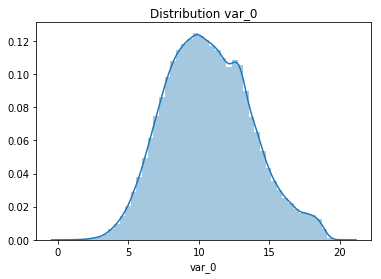

Index(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7',
       'var_8', 'var_9',
       ...
       'var_198', 'var_199', 'sum_rows', 'median_rows', 'mean_rows',
       'min_rows', 'max_rows', 'std_rows', 'skew_rows', 'kurt_rows'],
      dtype='object', length=208)

In [7]:
import seaborn as sns

%matplotlib inline
distPlot = sns.distplot(data['var_0'])
plt.title("Distribution var_0")
plt.show(distPlot)
cols = data.drop(['target'], axis=True).columns
cols

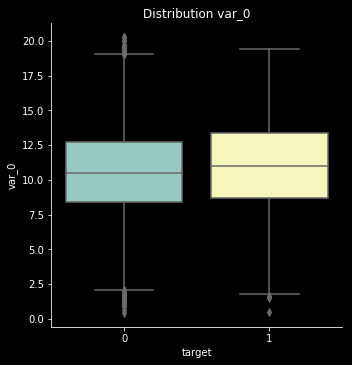

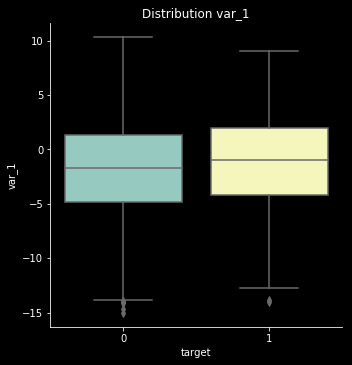

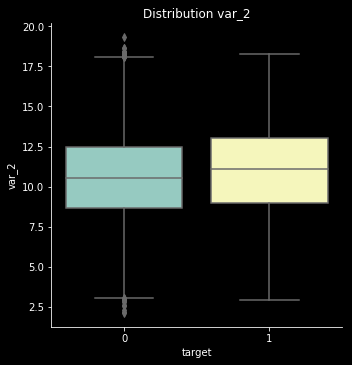

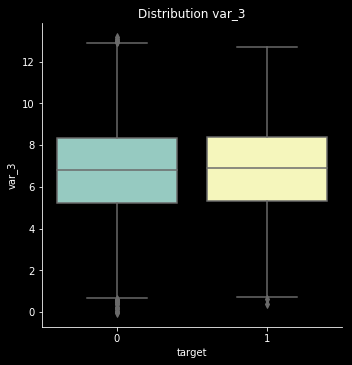

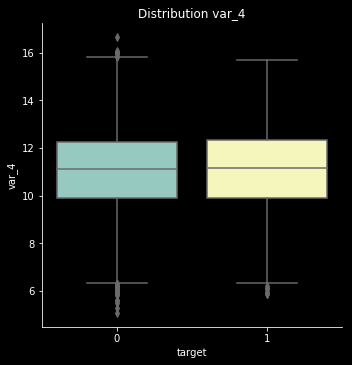

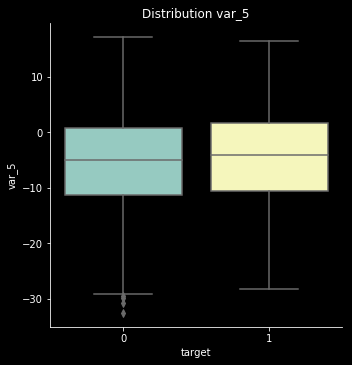

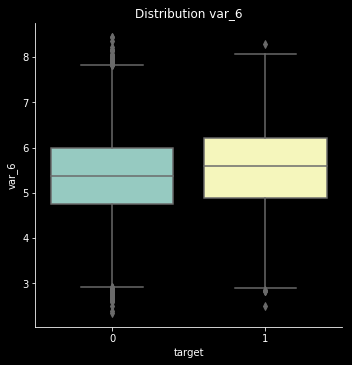

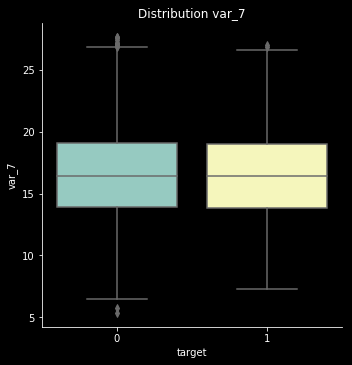

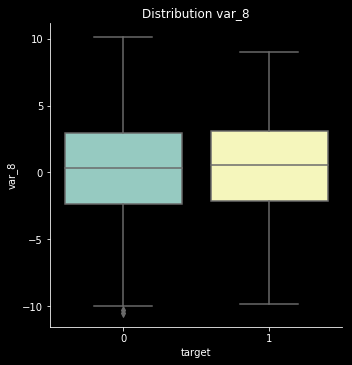

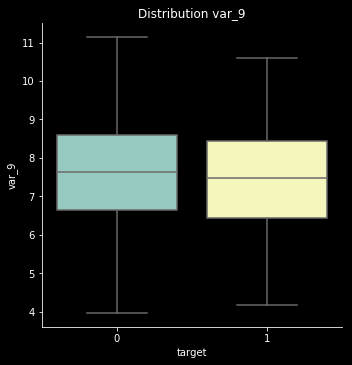

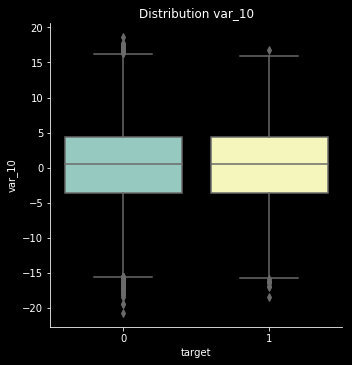

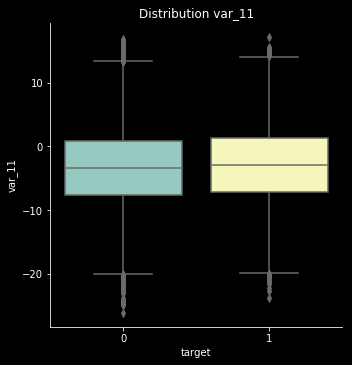

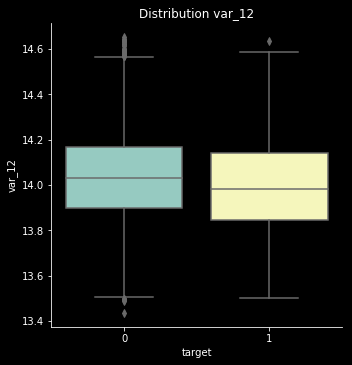

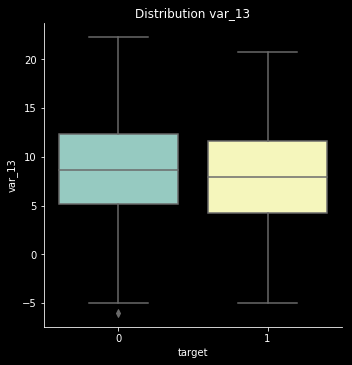

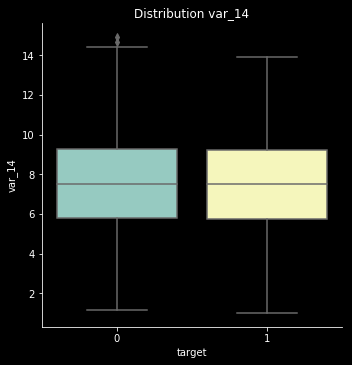

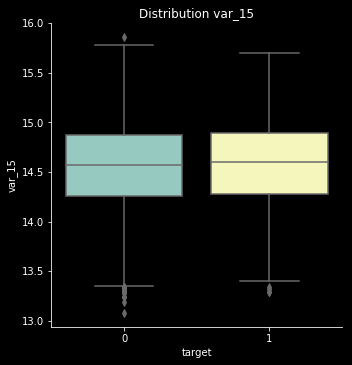

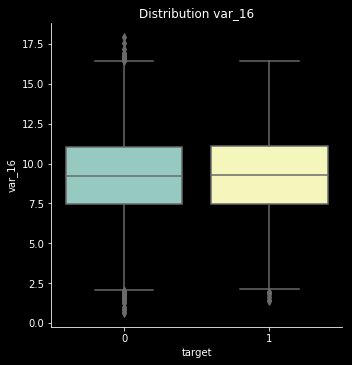

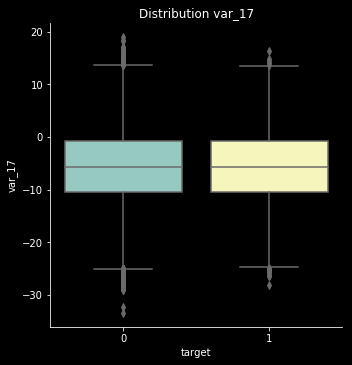

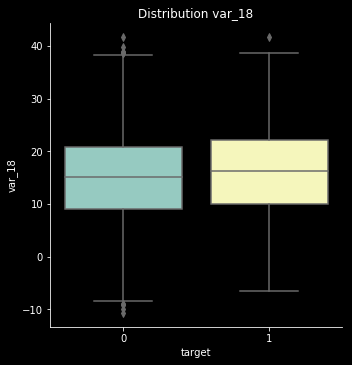

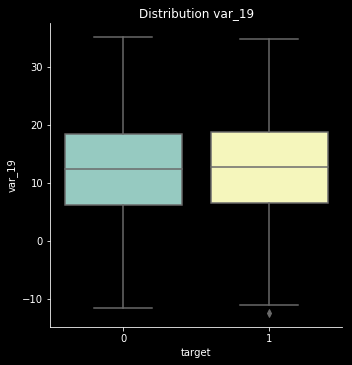

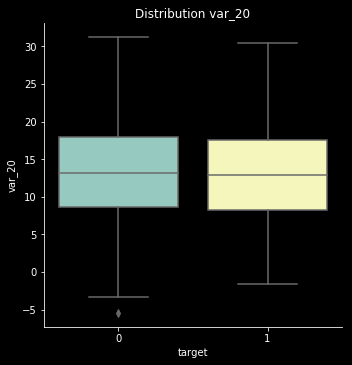

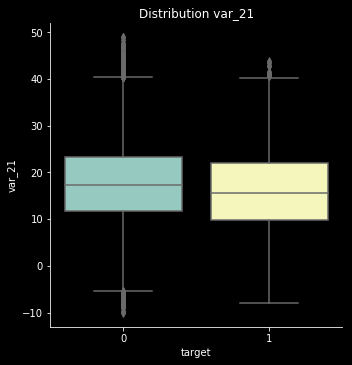

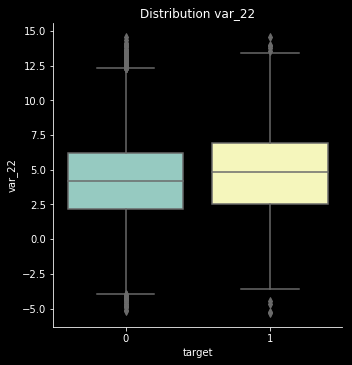

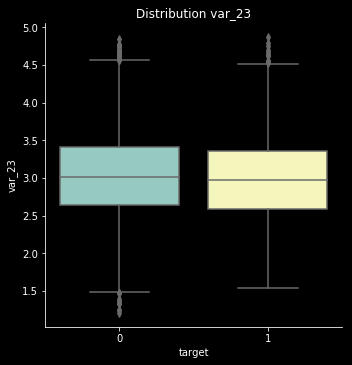

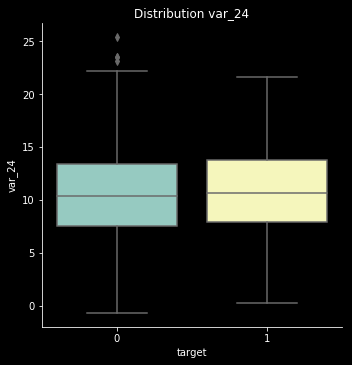

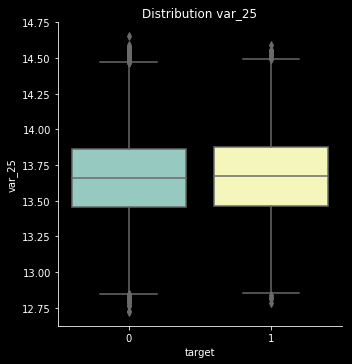

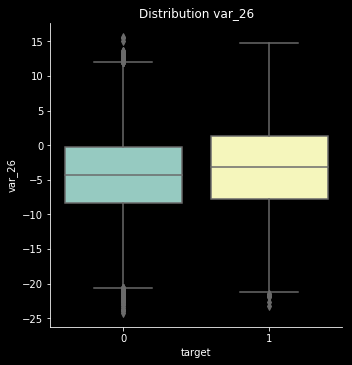

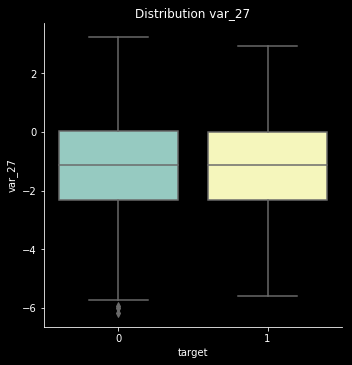

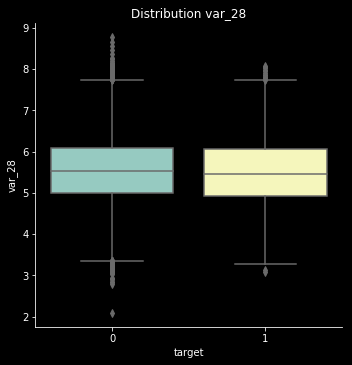

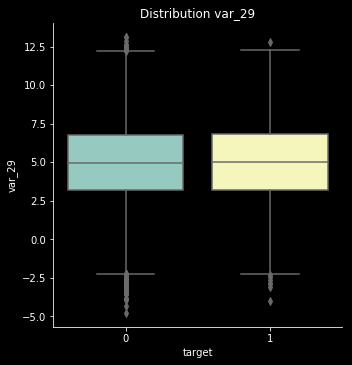

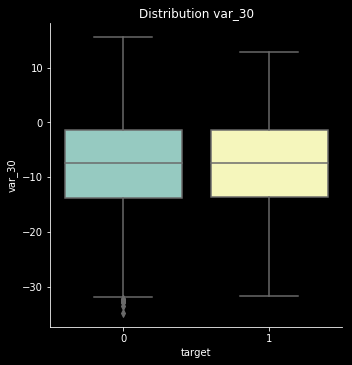

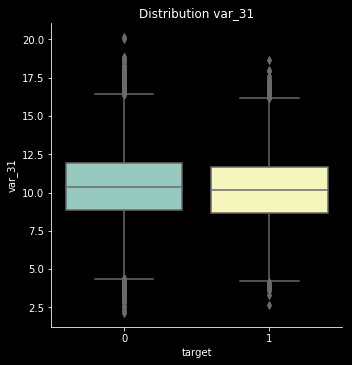

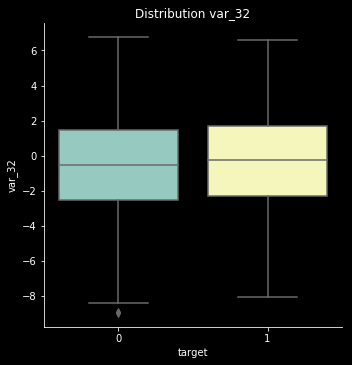

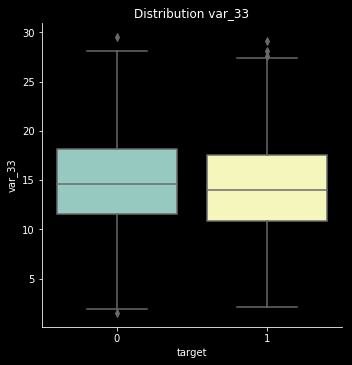

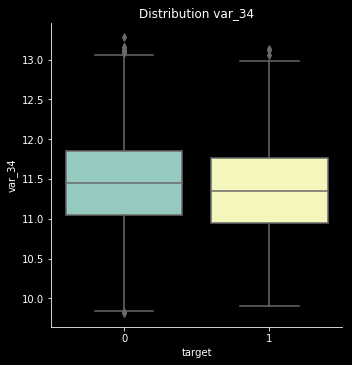

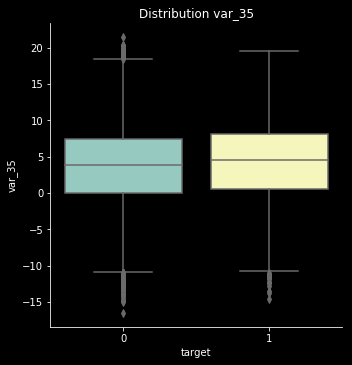

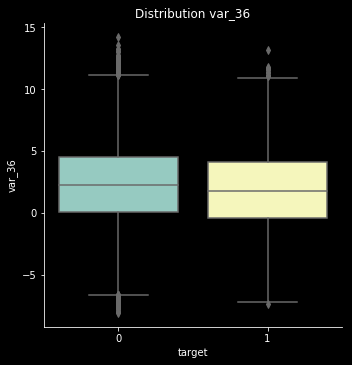

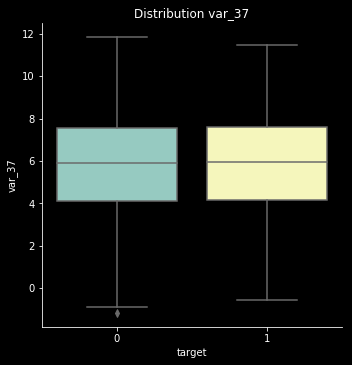

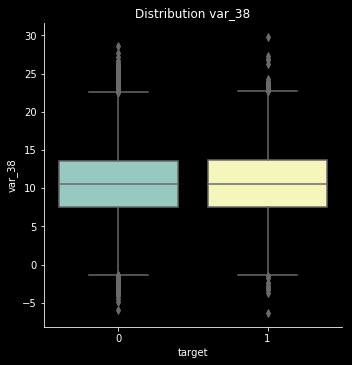

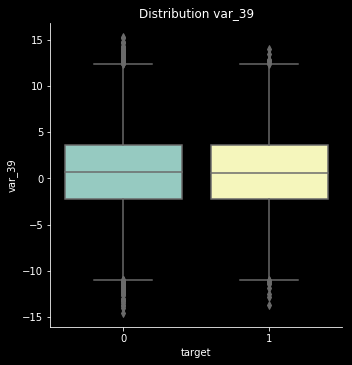

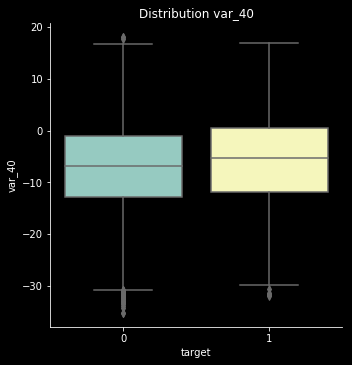

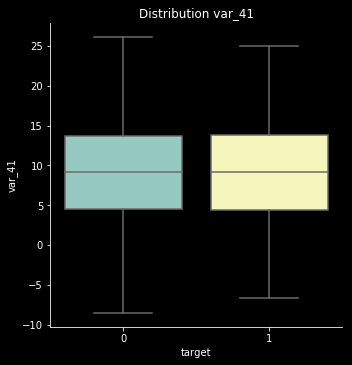

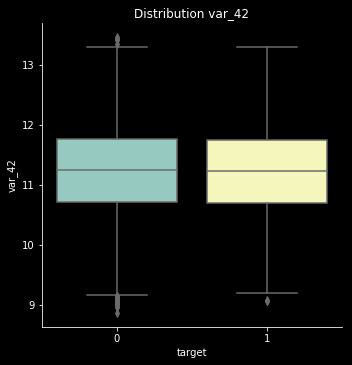

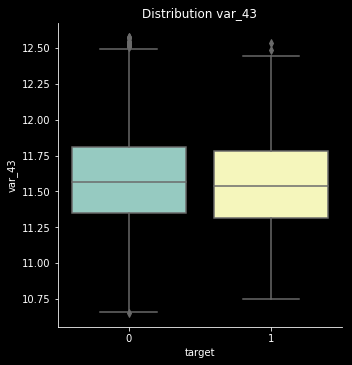

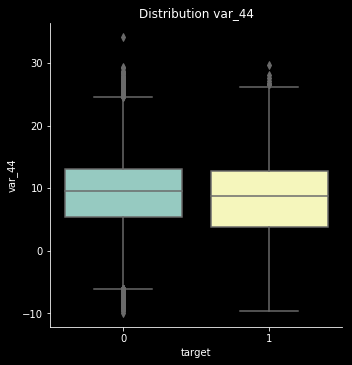

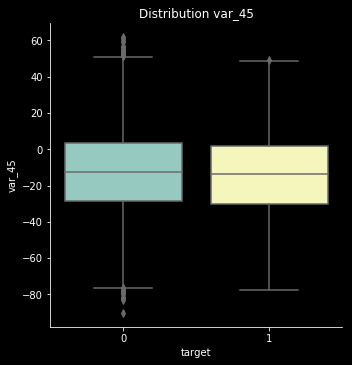

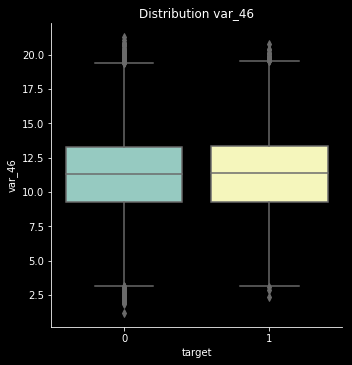

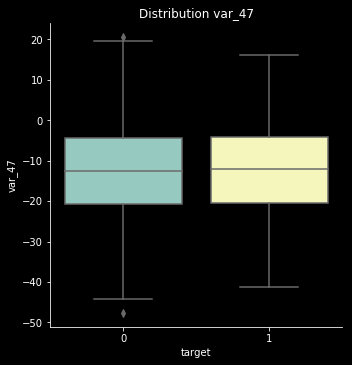

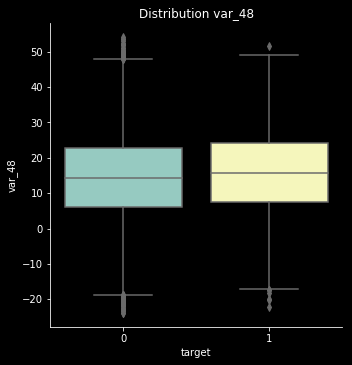

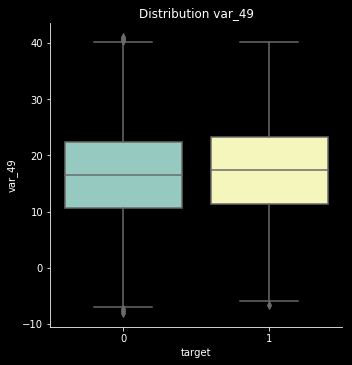

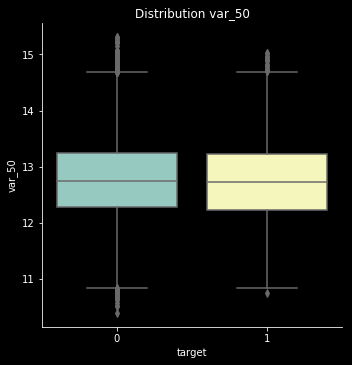

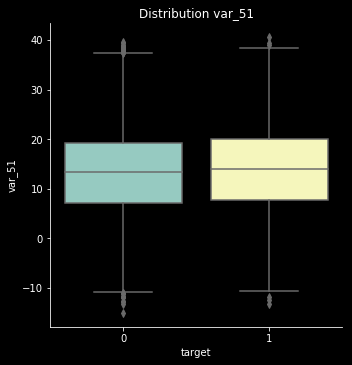

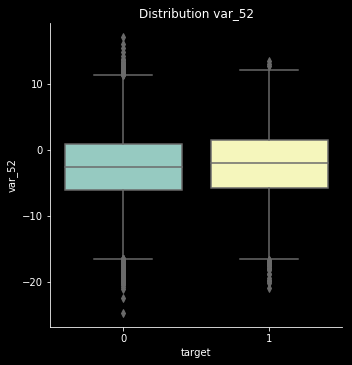

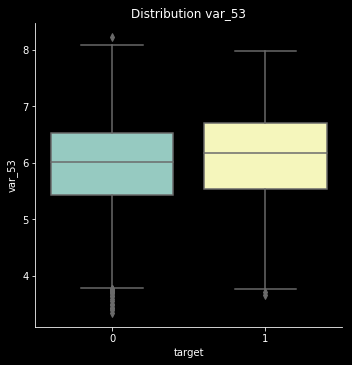

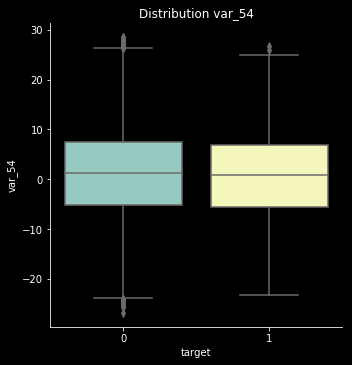

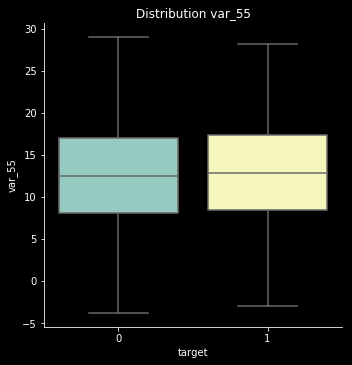

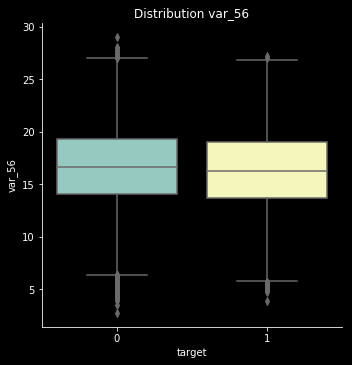

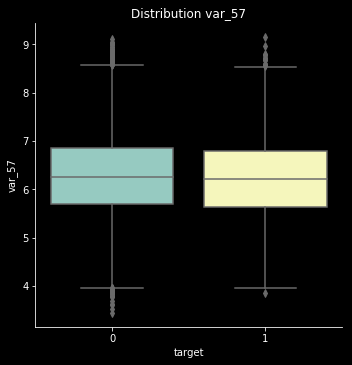

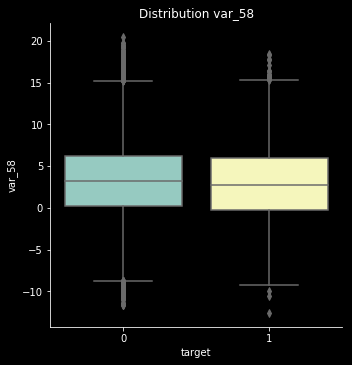

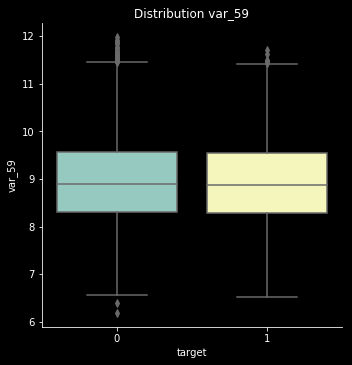

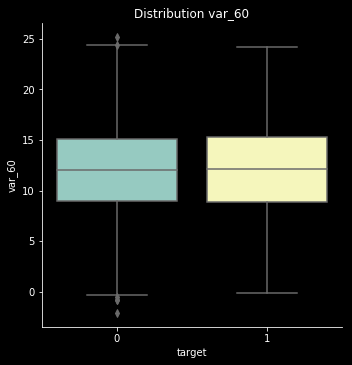

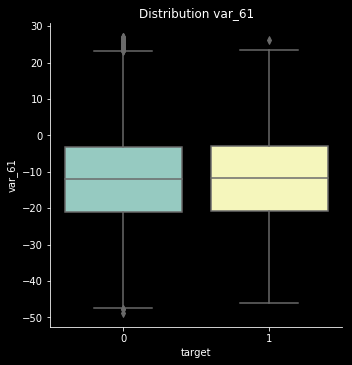

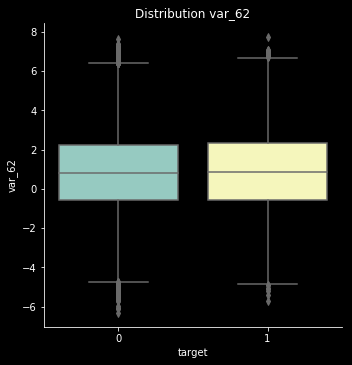

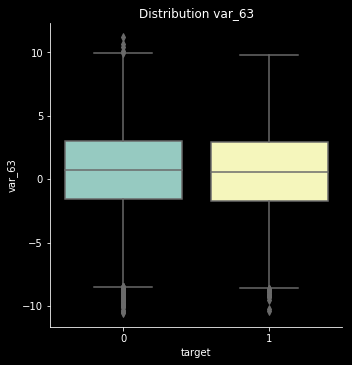

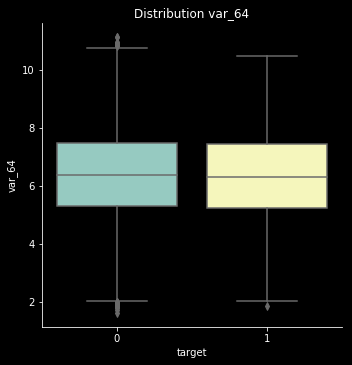

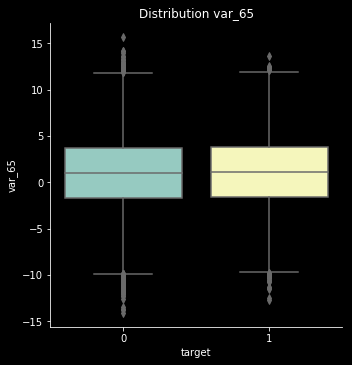

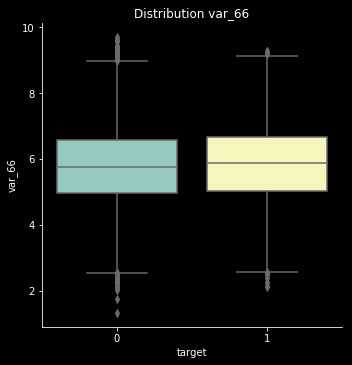

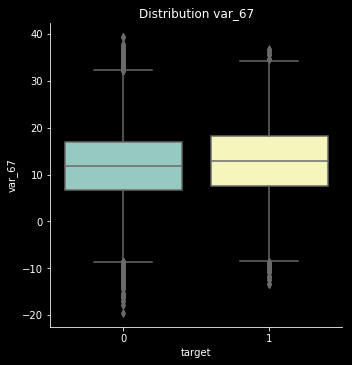

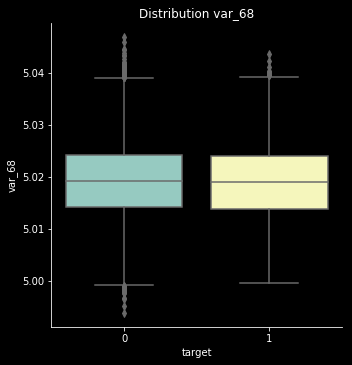

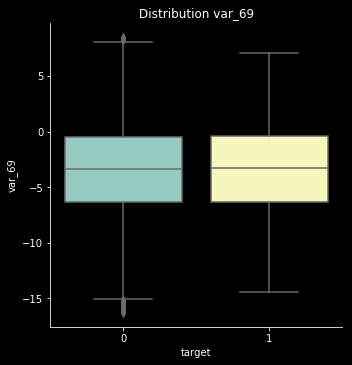

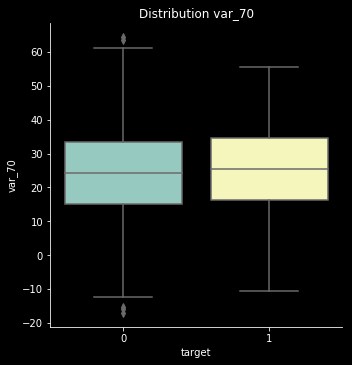

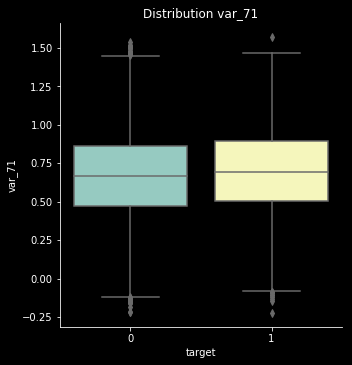

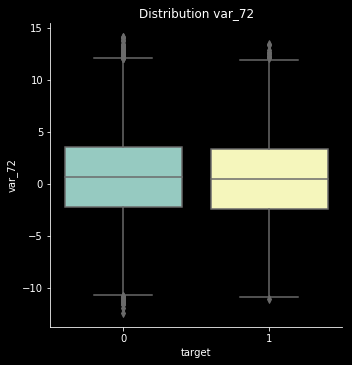

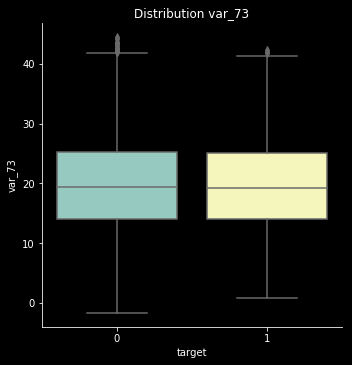

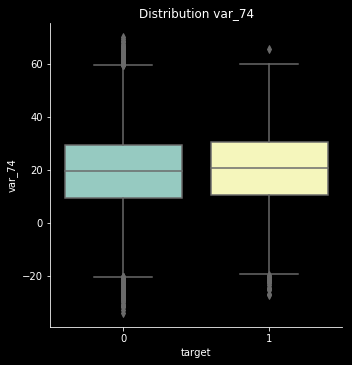

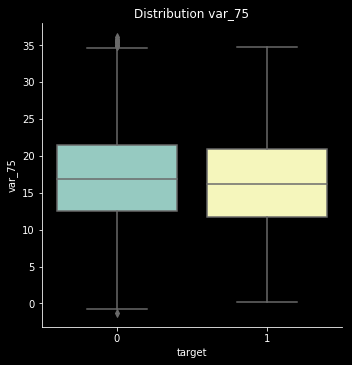

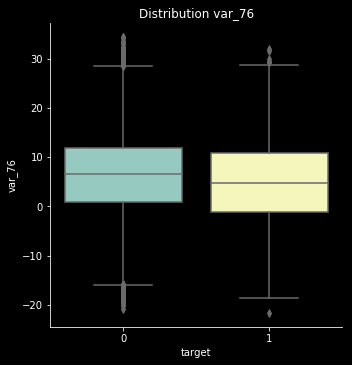

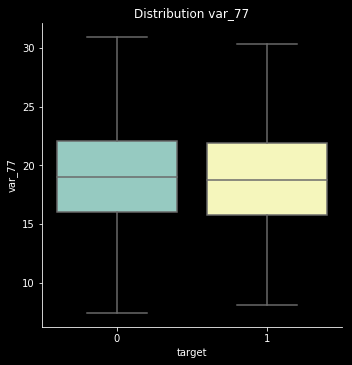

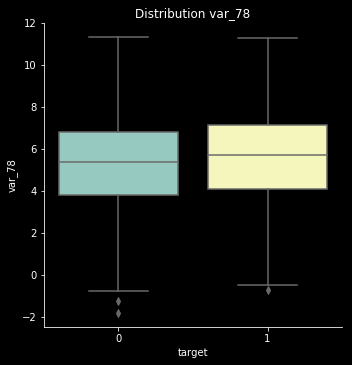

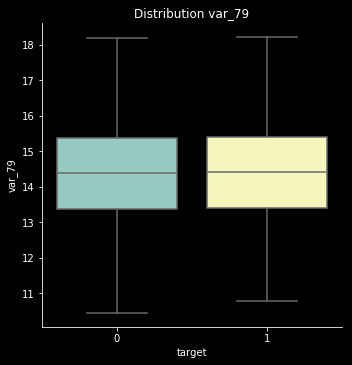

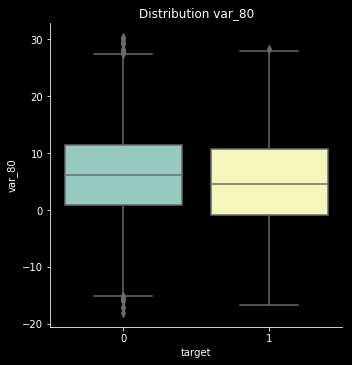

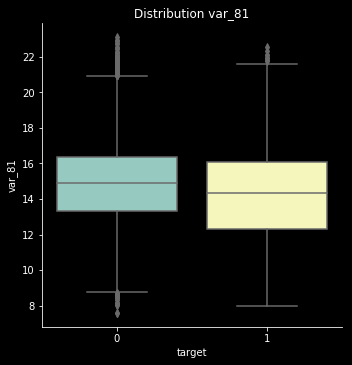

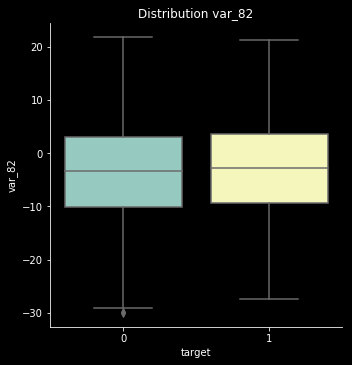

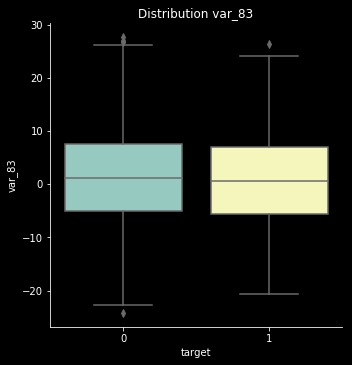

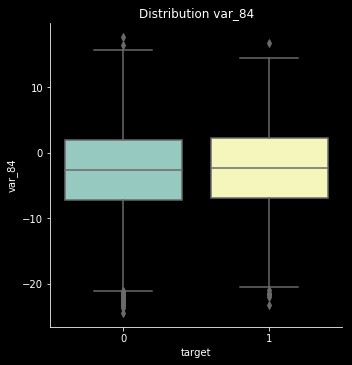

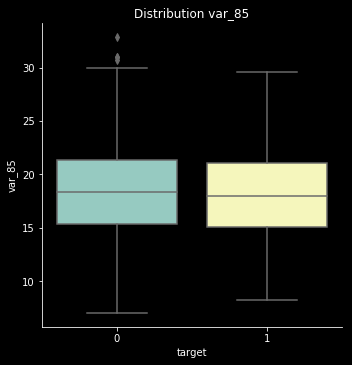

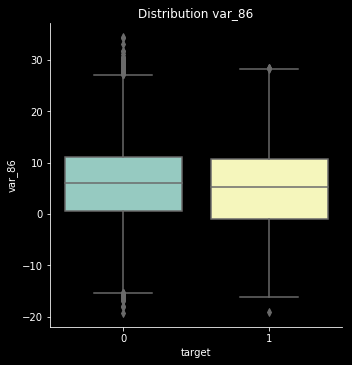

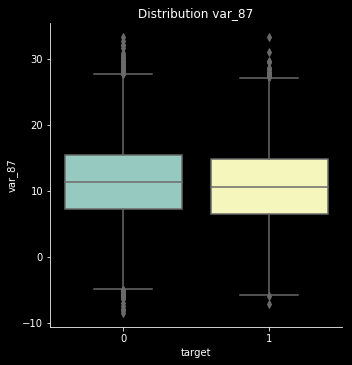

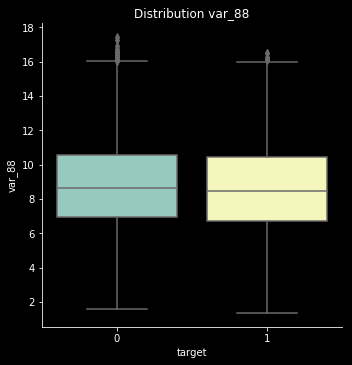

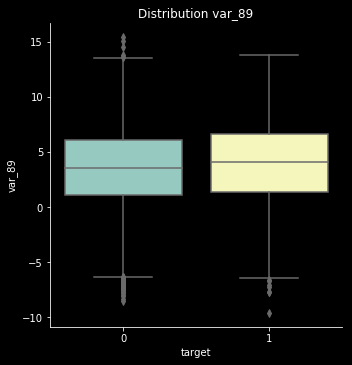

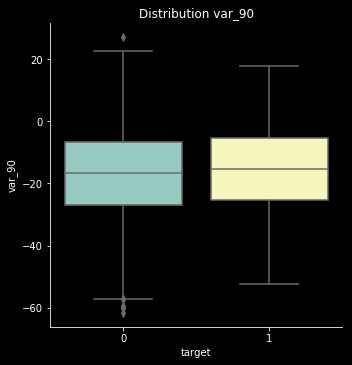

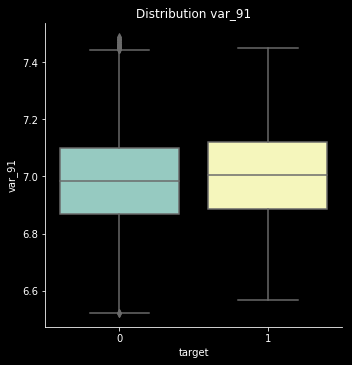

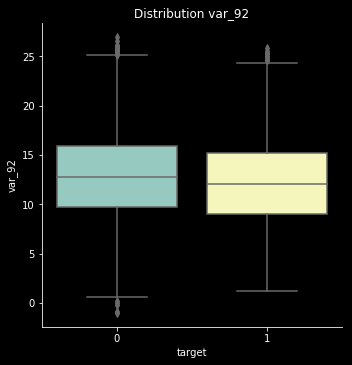

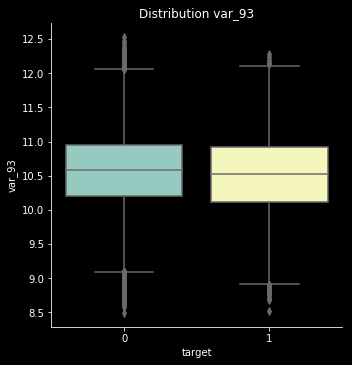

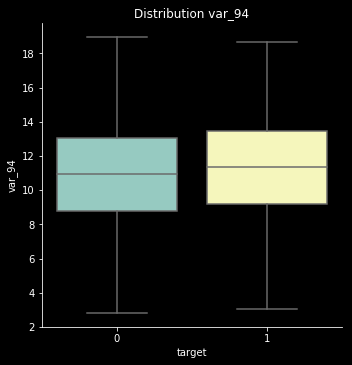

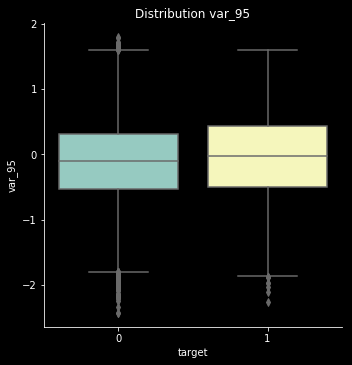

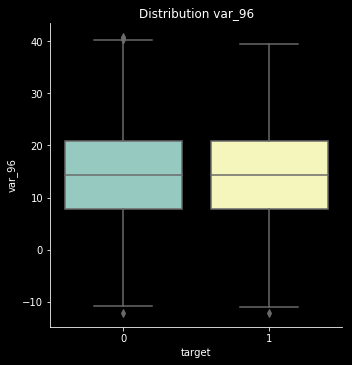

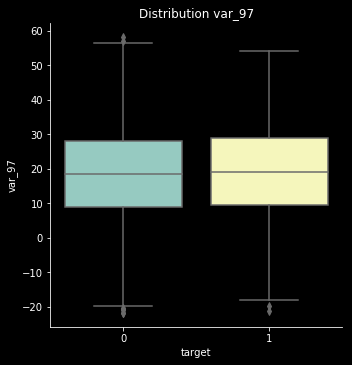

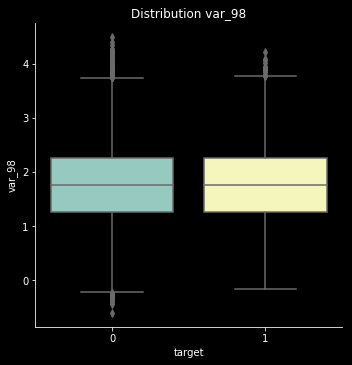

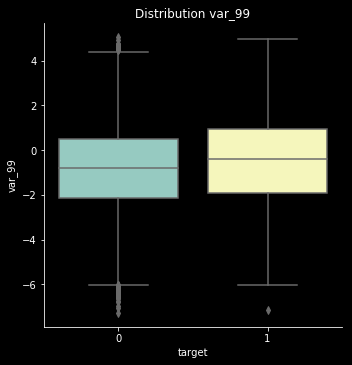

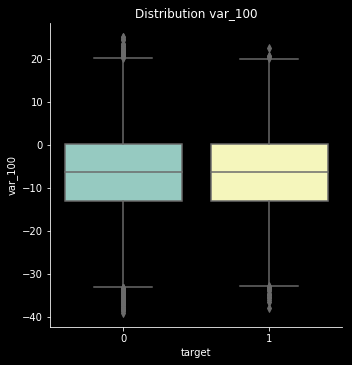

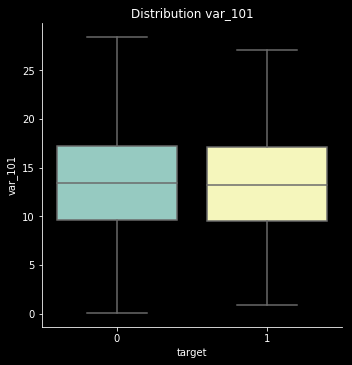

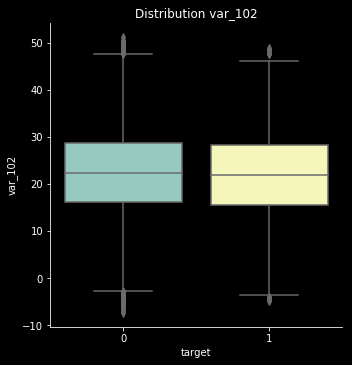

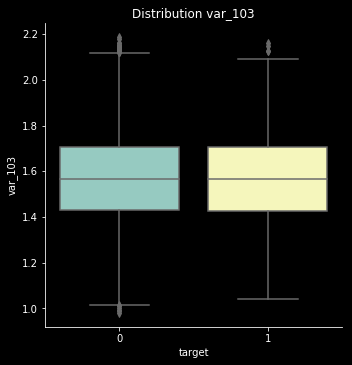

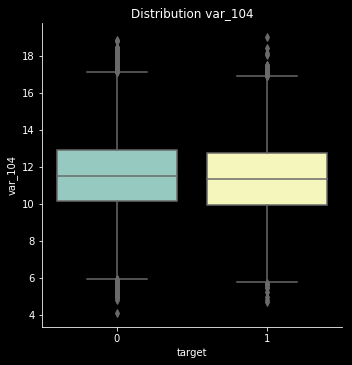

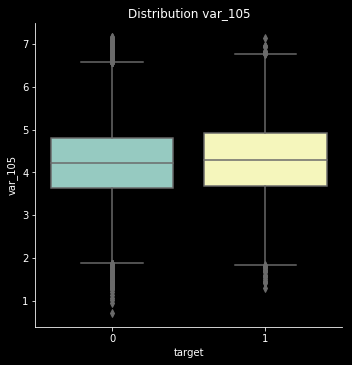

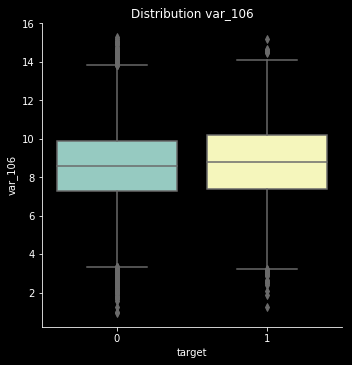

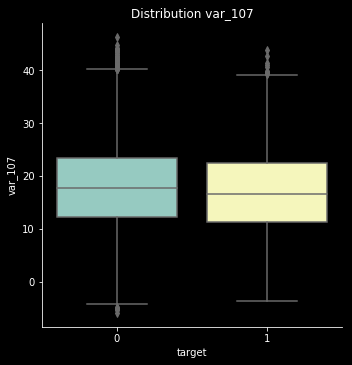

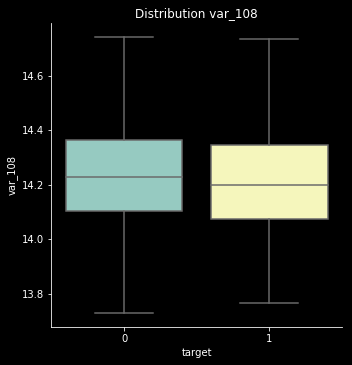

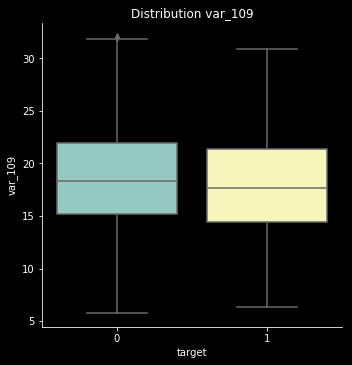

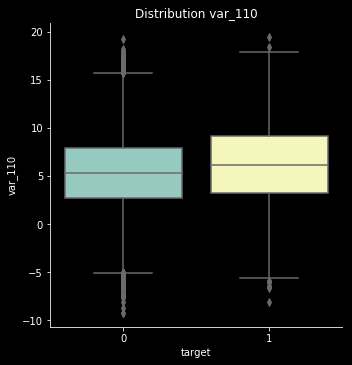

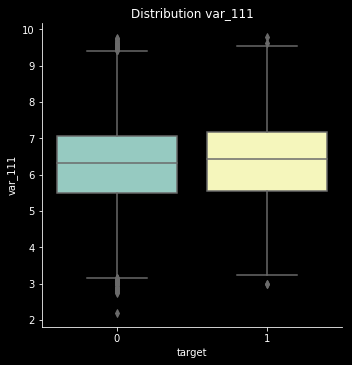

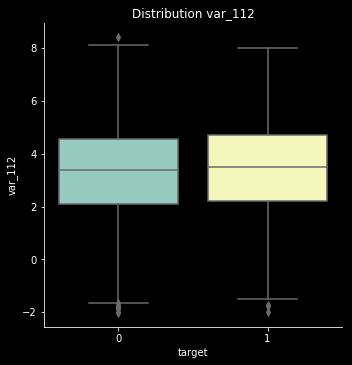

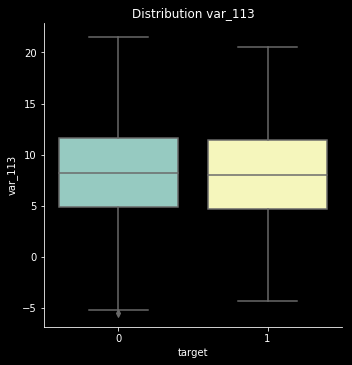

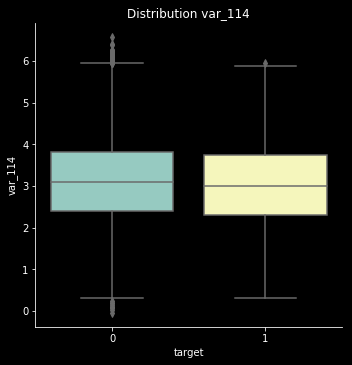

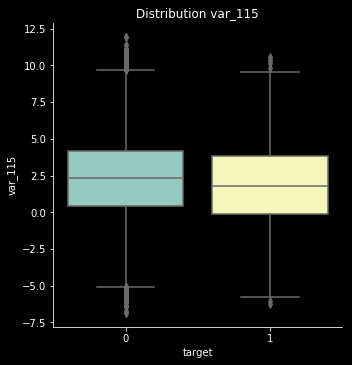

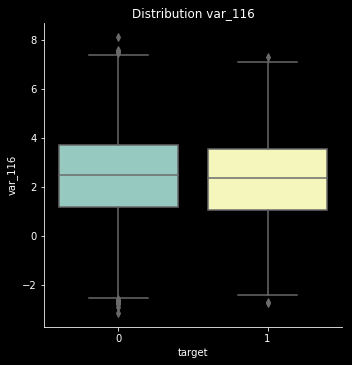

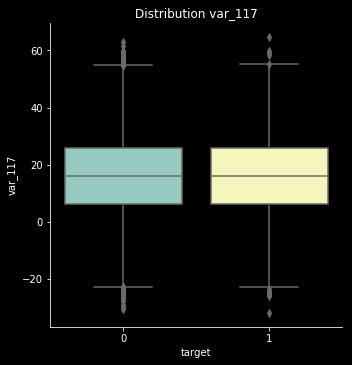

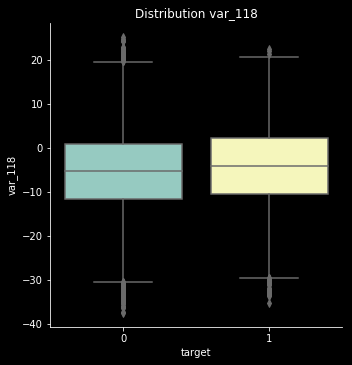

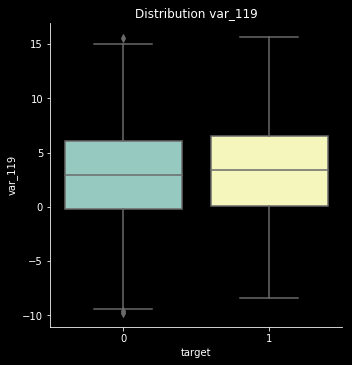

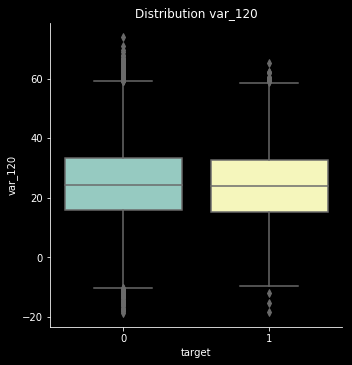

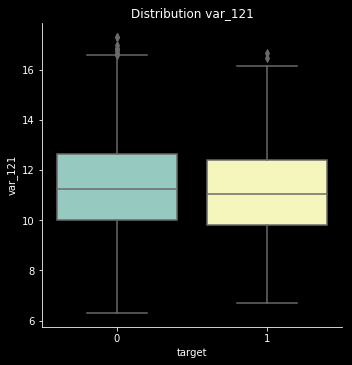

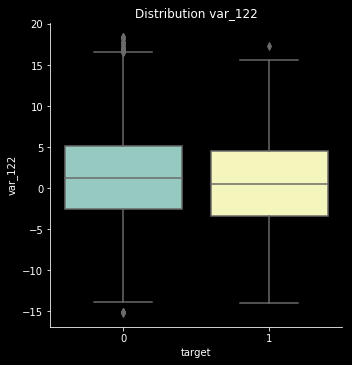

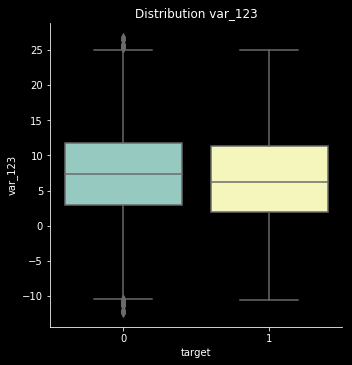

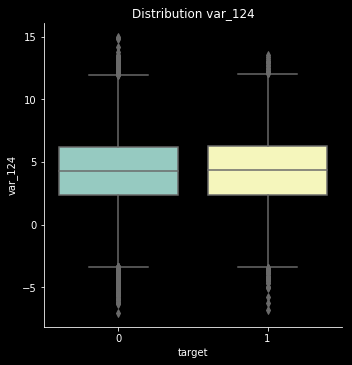

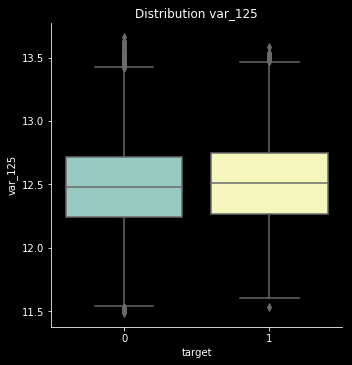

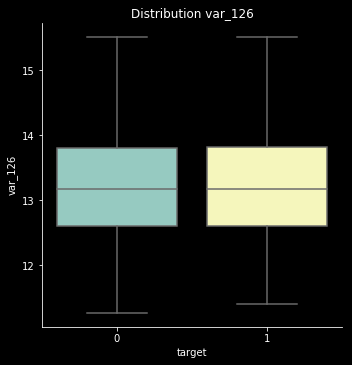

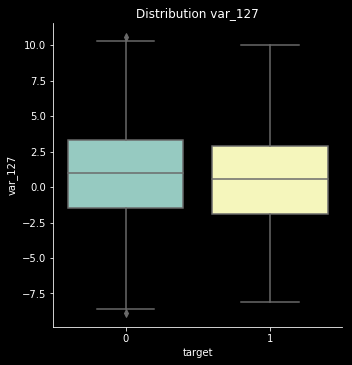

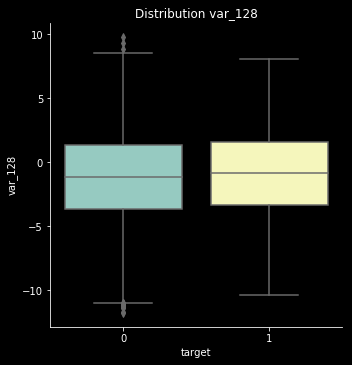

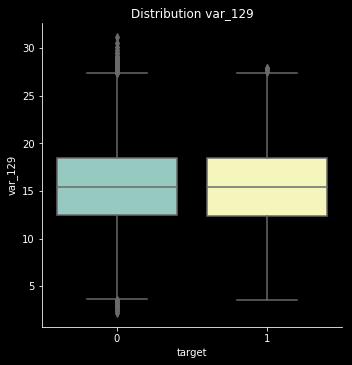

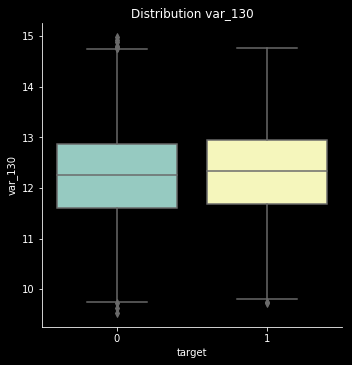

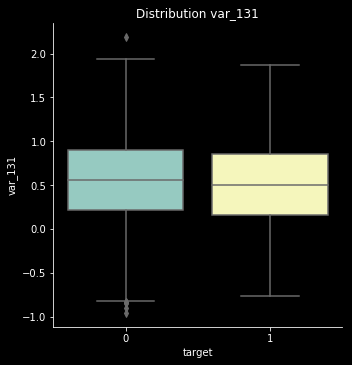

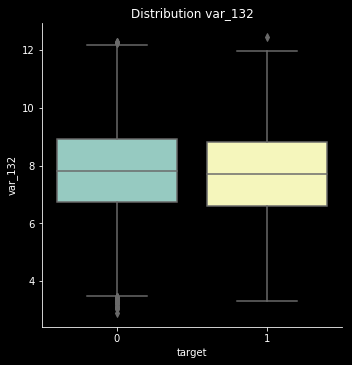

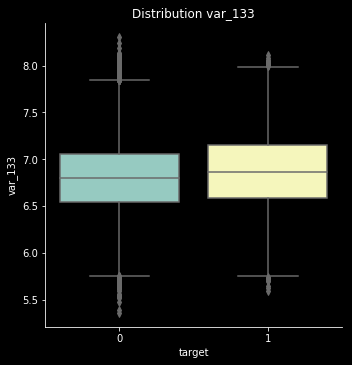

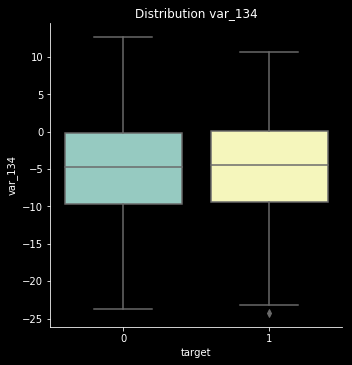

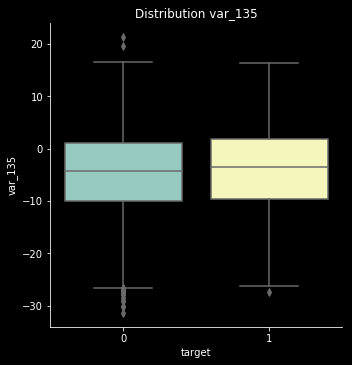

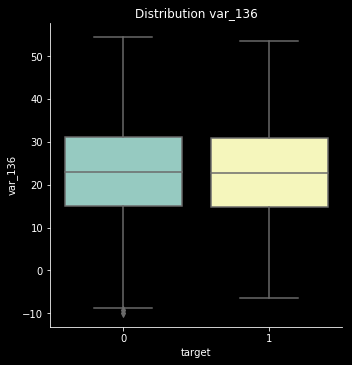

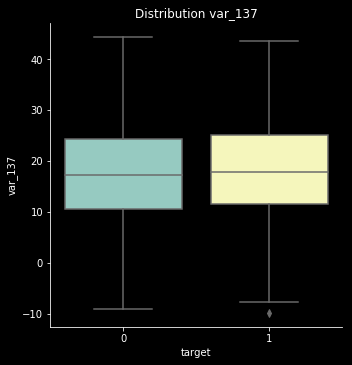

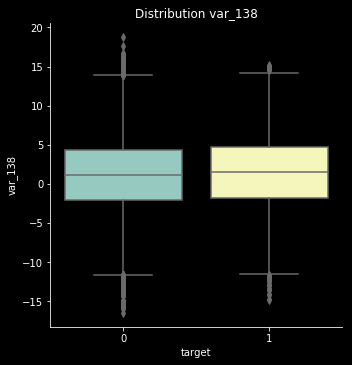

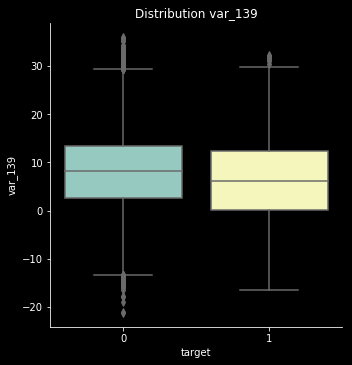

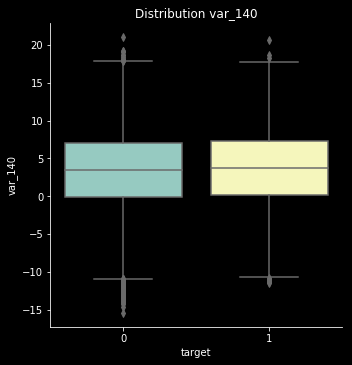

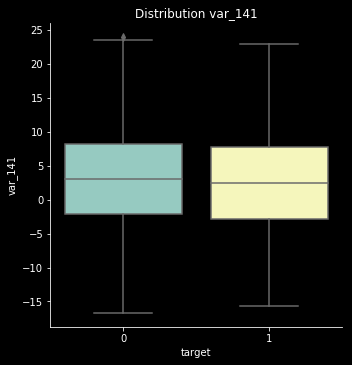

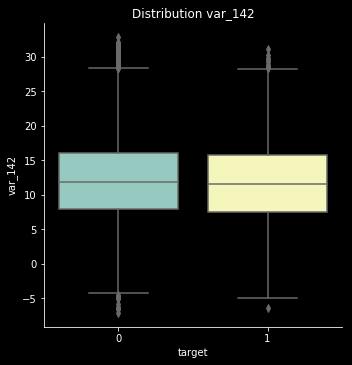

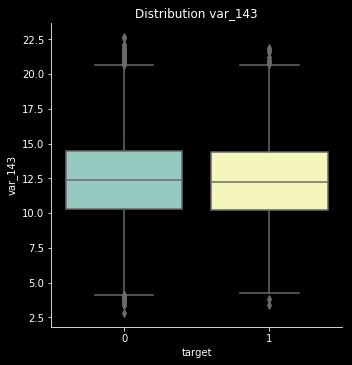

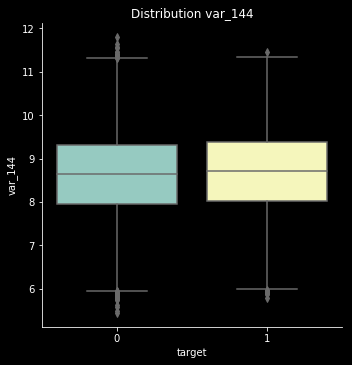

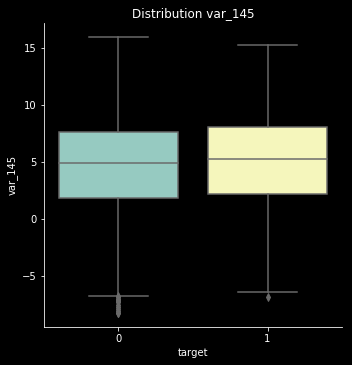

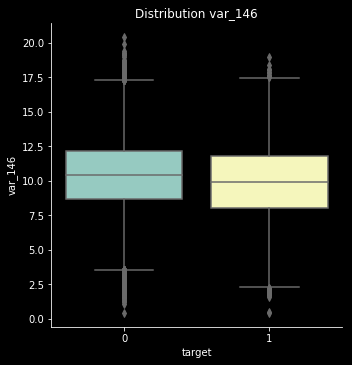

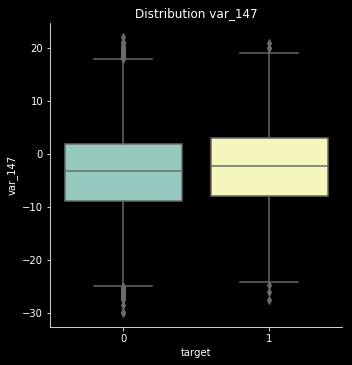

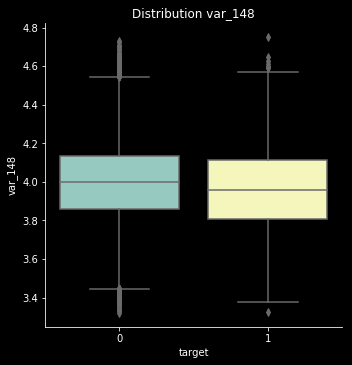

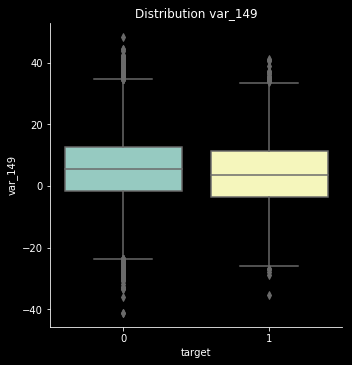

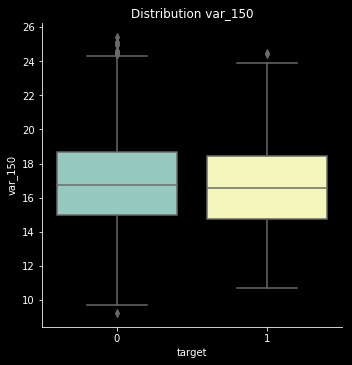

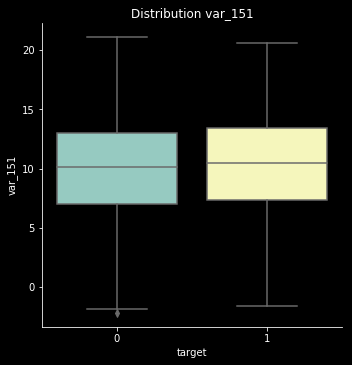

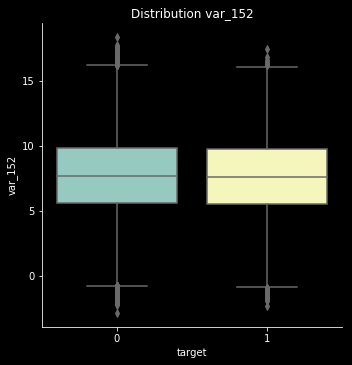

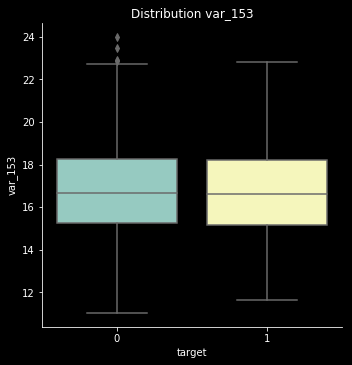

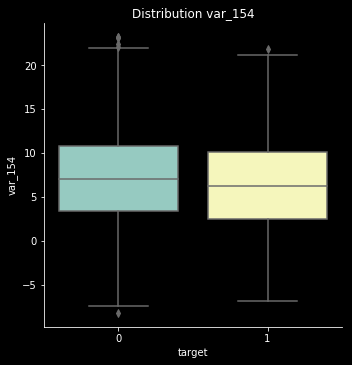

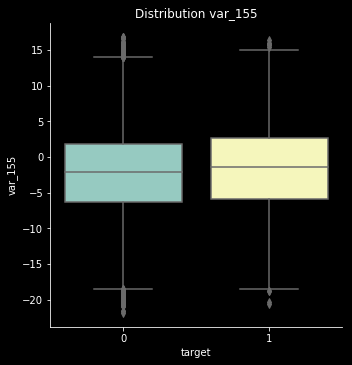

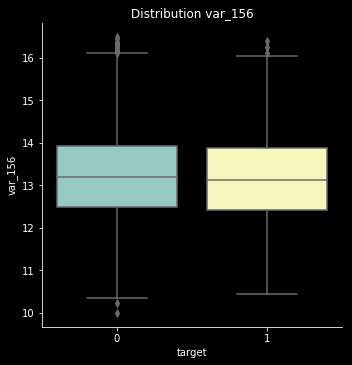

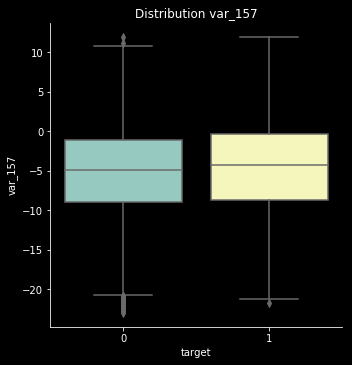

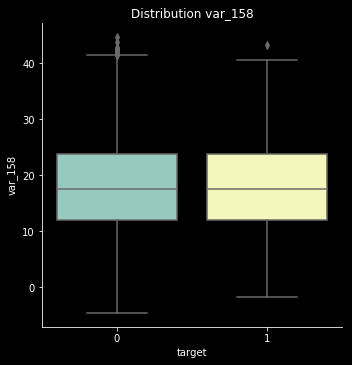

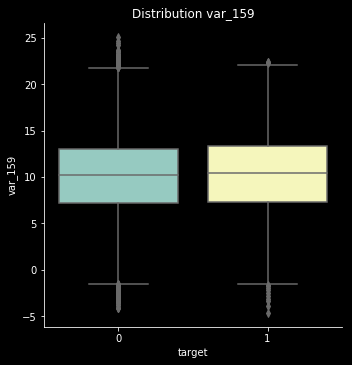

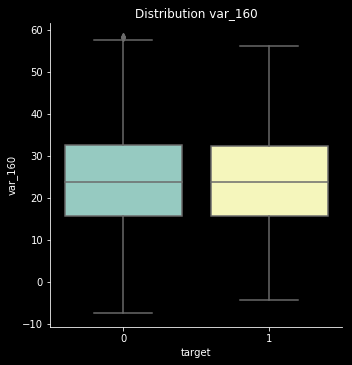

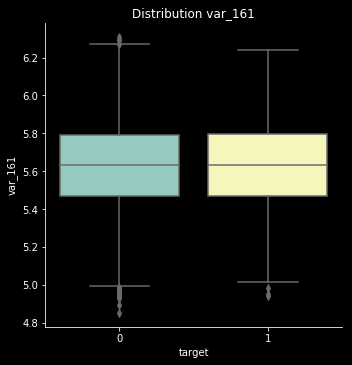

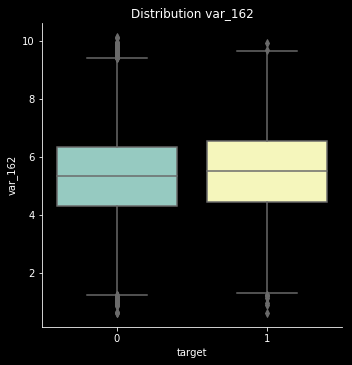

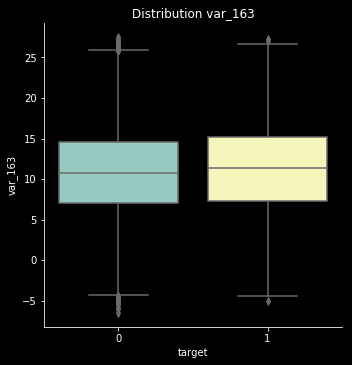

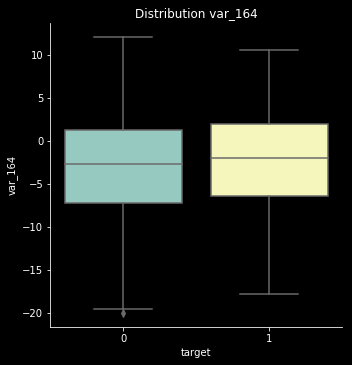

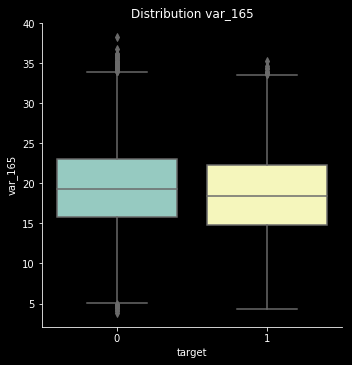

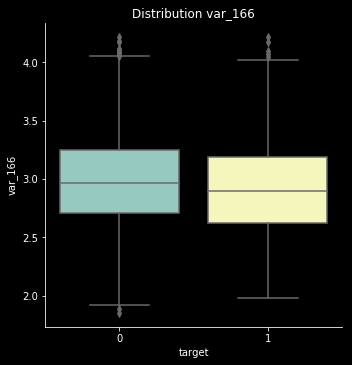

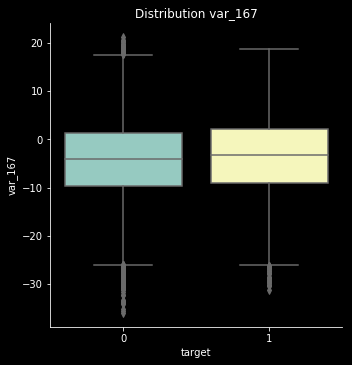

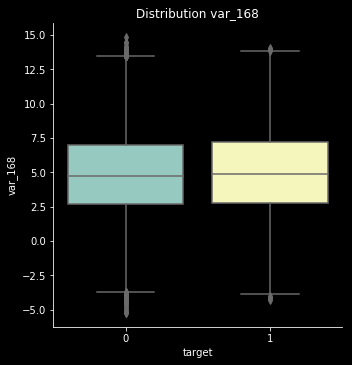

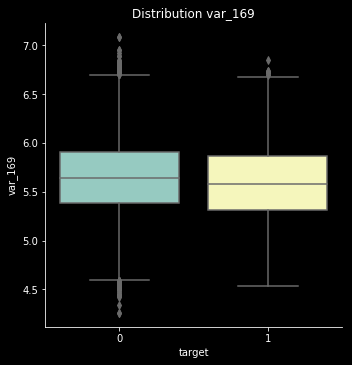

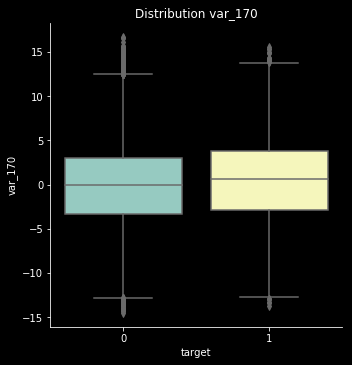

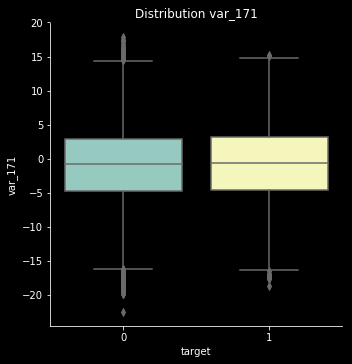

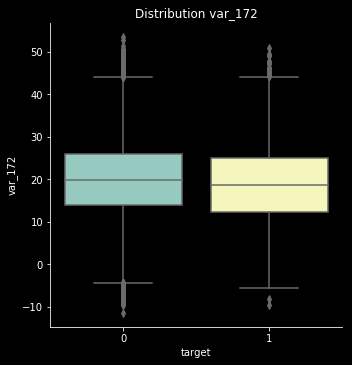

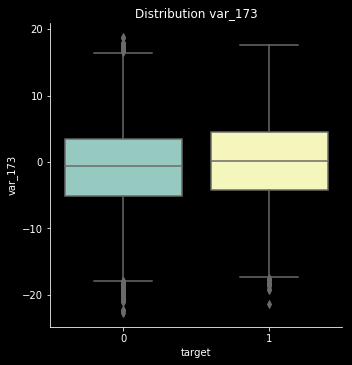

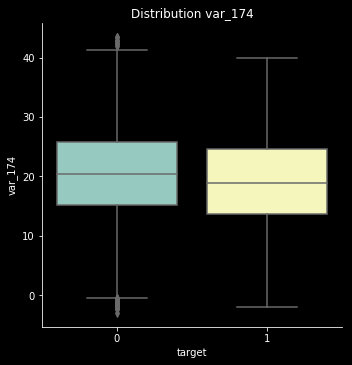

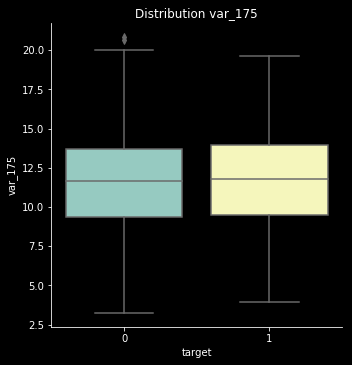

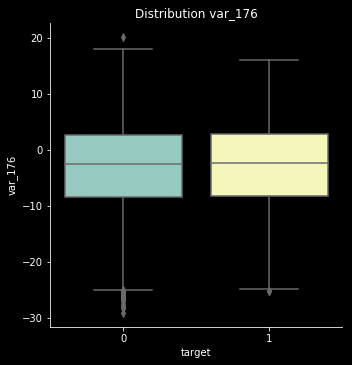

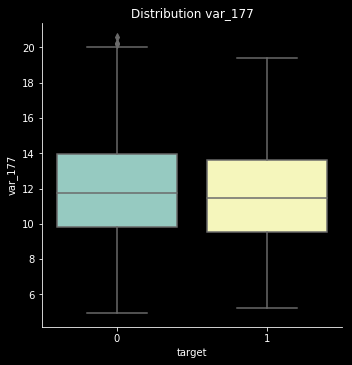

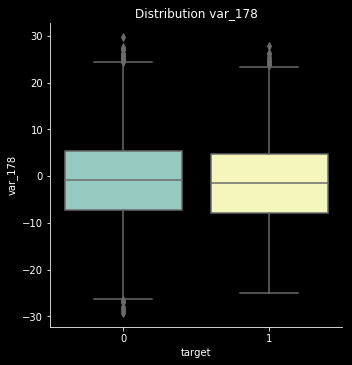

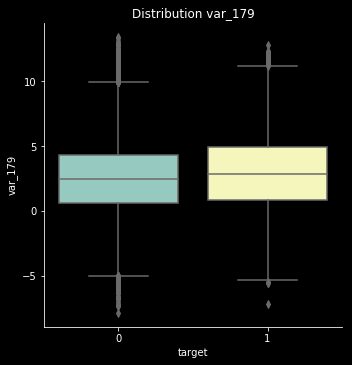

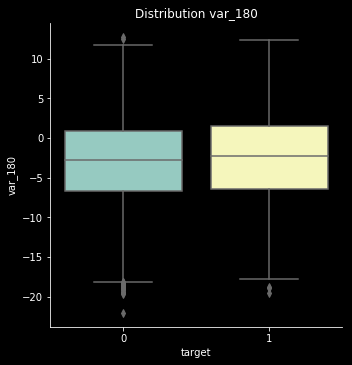

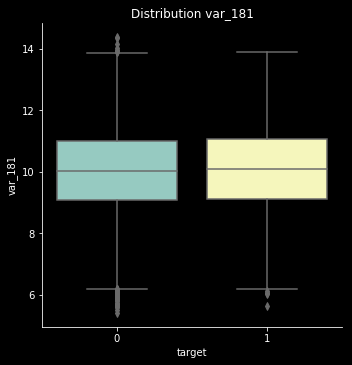

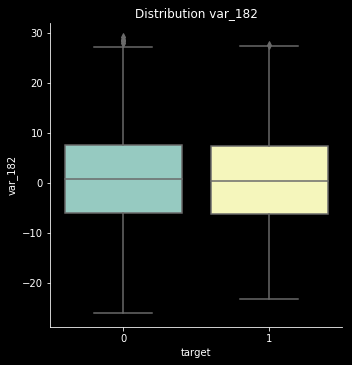

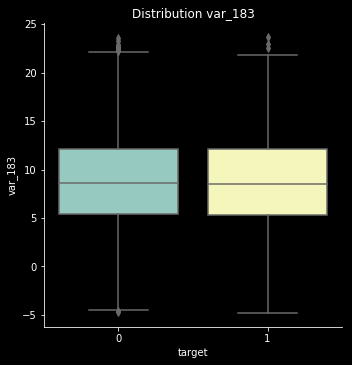

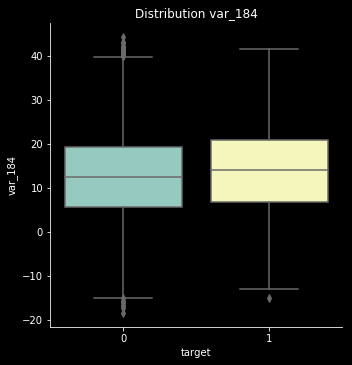

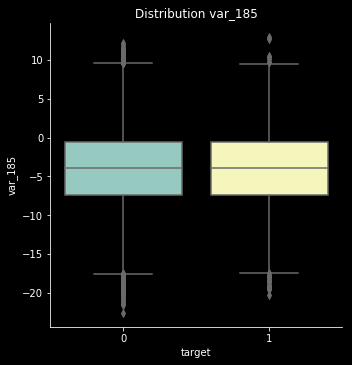

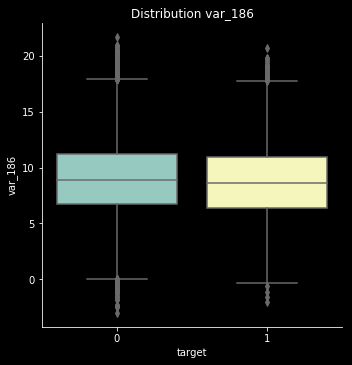

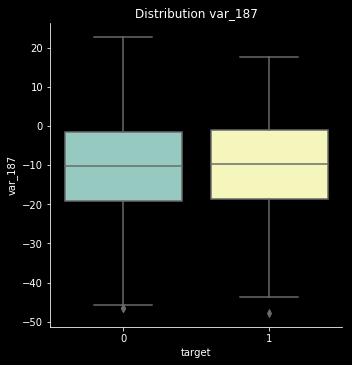

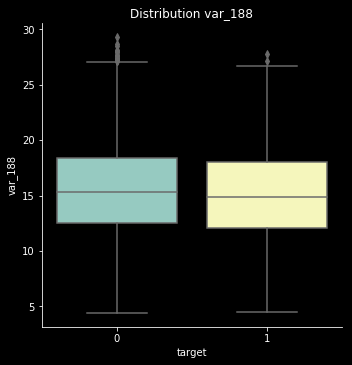

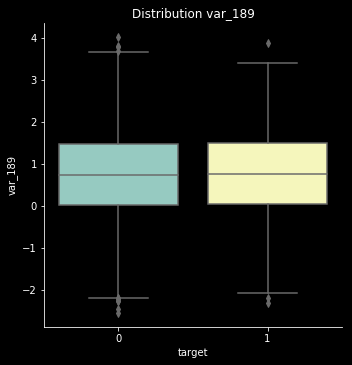

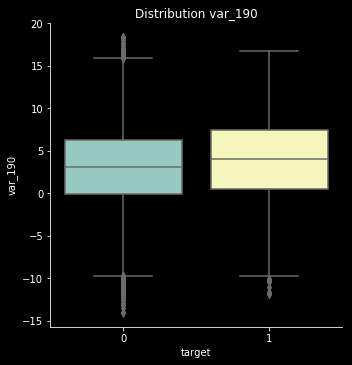

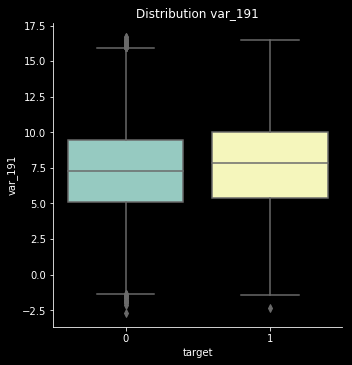

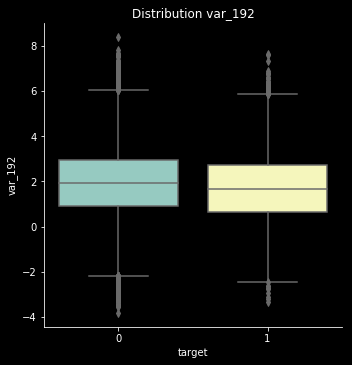

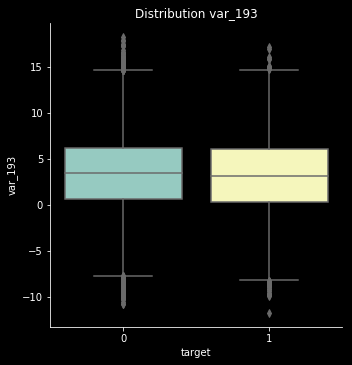

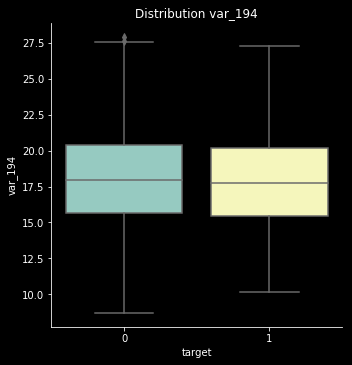

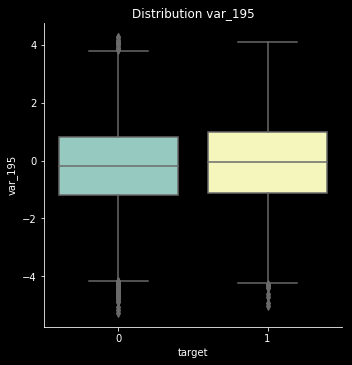

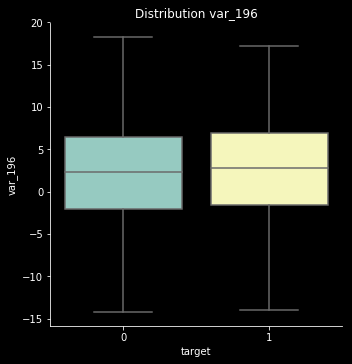

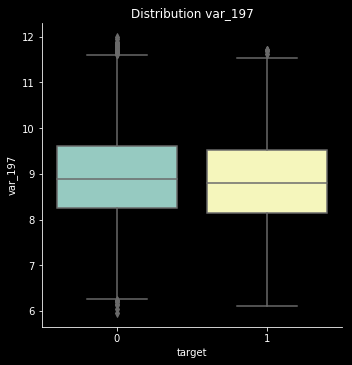

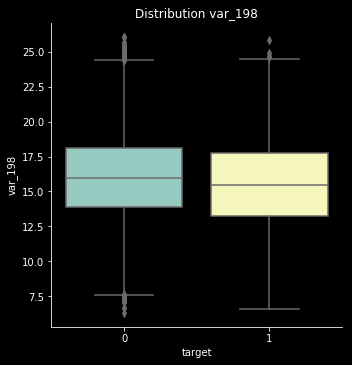

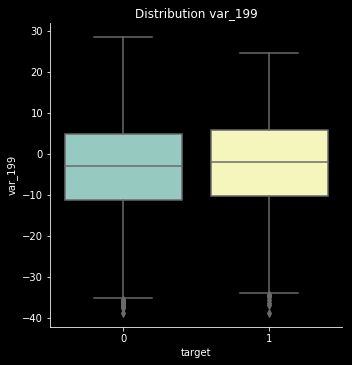

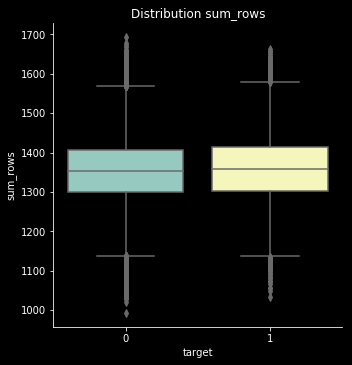

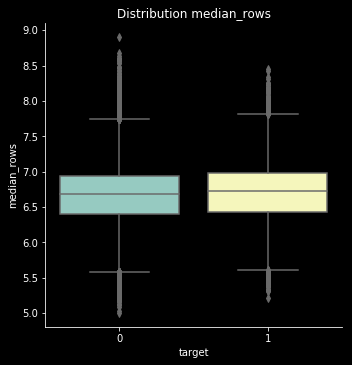

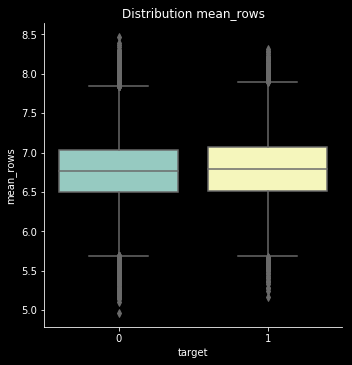

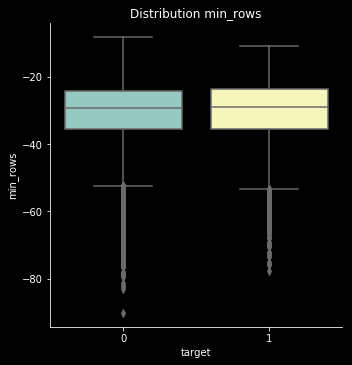

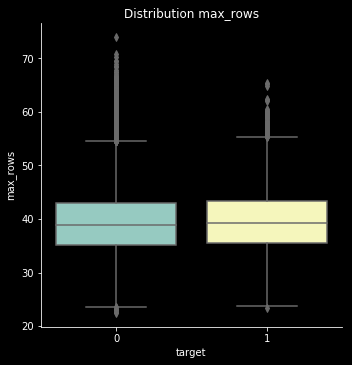

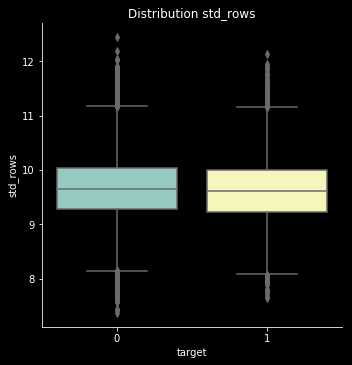

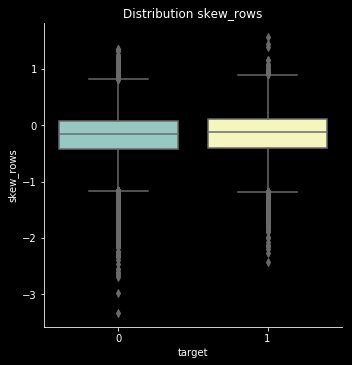

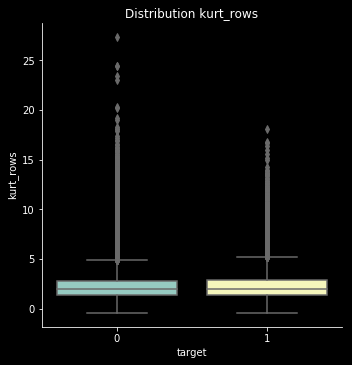

In [8]:
import seaborn as sns
%matplotlib inline
cols = data.drop(['target'], axis=True).columns
for i in cols:
    plt.style.use(['dark_background'])
    plot = sns.catplot(x='target', y=i, kind="box", data=data[['target', i]])    
    plt.title("Distribution "+ i)
    plt.show(plot)
    

In [ ]:
def main():
    '''Here, you wil put the pipeline'''

    
    
    
main()